In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [9]:
# Load the dataset
df = pd.read_csv('BankChurners.csv')

# Quick inspection of the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Unnamed: 7                0 non-null      float64
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
 # question 1
column_types = {
    "CLIENTNUM": "Nominal",  # Unique identifier, nominal
    "Attrition_Flag": "Nominal",  # Churn status, nominal
    "Customer_Age": "Ratio",  # Age in years, ratio
    "Gender": "Nominal",  # Gender, nominal
    "Dependent_count": "Ratio",  # Count, ratio
    "Education_Level": "Ordinal",  # Education level, ordinal
    "Marital_Status": "Nominal",  # Marital status, nominal
    "Income_Category": "Ordinal",  # Income range, ordinal
    "Card_Category": "Nominal",  # Credit card type, nominal
    "Months_on_book": "Ratio",  # Months with the bank, ratio
    "Total_Relationship_Count": "Ratio",  # Count of products, ratio
    "Months_Inactive_12_mon": "Ratio",  # Count of inactive months, ratio
    "Contacts_Count_12_mon": "Ratio",  # Count of contacts, ratio
    "Credit_Limit": "Ratio",  # Monetary limit, ratio
    "Total_Revolving_Bal": "Ratio",  # Revolving balance, ratio
    "Avg_Open_To_Buy": "Ratio",  # Credit available, ratio
    "Total_Amt_Chng_Q4_Q1": "Ratio",  # Change in transaction amount, ratio
    "Total_Trans_Amt": "Ratio",  # Total transaction amount, ratio
    "Total_Trans_Ct": "Ratio",  # Total transaction count, ratio
    "Total_Ct_Chng_Q4_Q1": "Ratio",  # Change in transaction count, ratio
    "Avg_Utilization_Ratio": "Ratio"  # Utilization ratio, ratio
}

print("Feature Classification:", column_types)


Feature Classification: {'CLIENTNUM': 'Nominal', 'Attrition_Flag': 'Nominal', 'Customer_Age': 'Ratio', 'Gender': 'Nominal', 'Dependent_count': 'Ratio', 'Education_Level': 'Ordinal', 'Marital_Status': 'Nominal', 'Income_Category': 'Ordinal', 'Card_Category': 'Nominal', 'Months_on_book': 'Ratio', 'Total_Relationship_Count': 'Ratio', 'Months_Inactive_12_mon': 'Ratio', 'Contacts_Count_12_mon': 'Ratio', 'Credit_Limit': 'Ratio', 'Total_Revolving_Bal': 'Ratio', 'Avg_Open_To_Buy': 'Ratio', 'Total_Amt_Chng_Q4_Q1': 'Ratio', 'Total_Trans_Amt': 'Ratio', 'Total_Trans_Ct': 'Ratio', 'Total_Ct_Chng_Q4_Q1': 'Ratio', 'Avg_Utilization_Ratio': 'Ratio'}


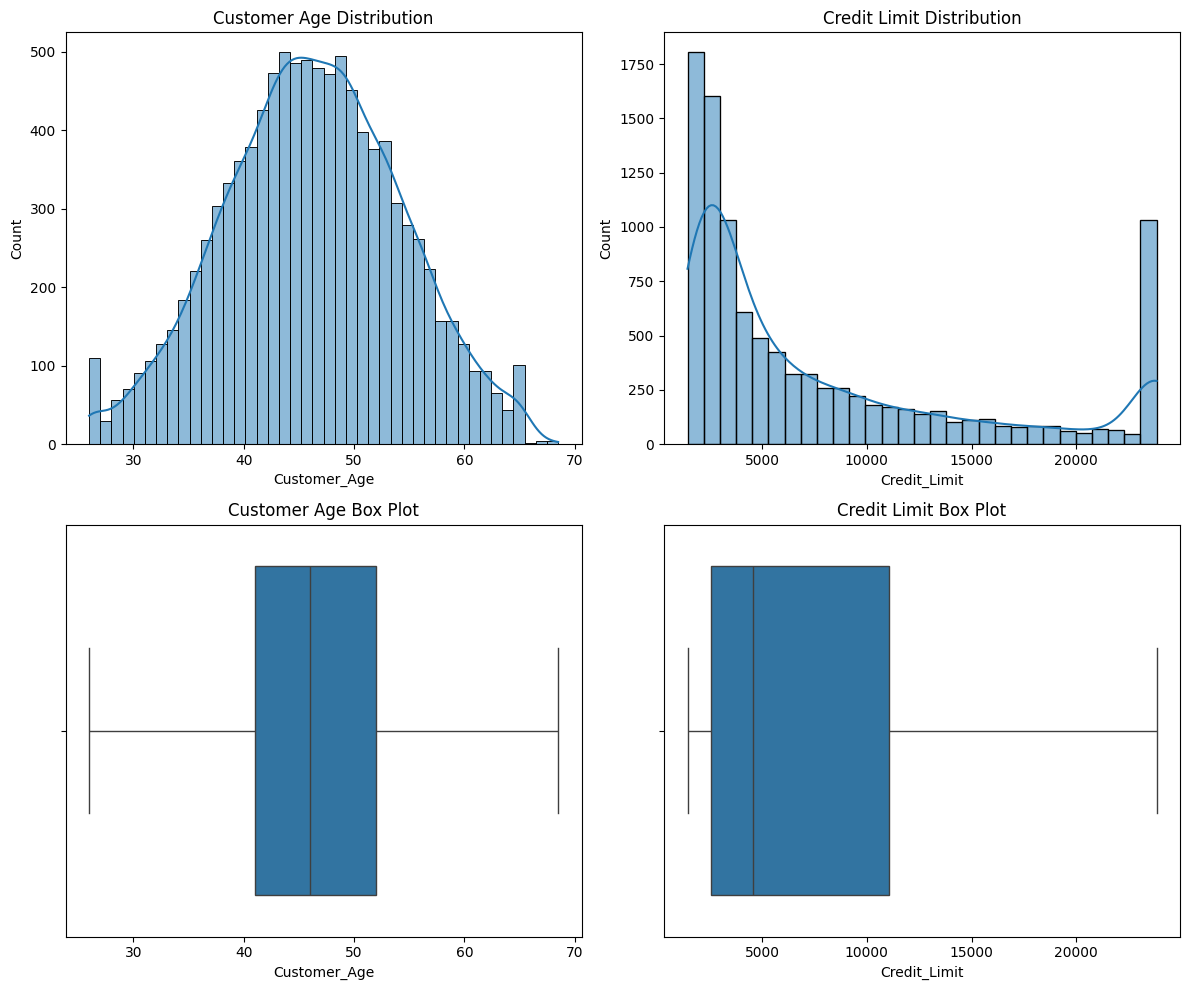

Number of IMDb Rating outliers: 0
Number of Rotten Tomatoes Score outliers: 0


In [19]:
# Columns 'Customer_Age' and 'Credit_Limit' are present, so we can proceed with plotting histograms and box plots as instructed.

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for histograms and box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Customer_Age plots
sns.histplot(df['Customer_Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Customer Age Distribution')
sns.boxplot(x=df['Customer_Age'], ax=axes[1, 0])
axes[1, 0].set_title('Customer Age Box Plot')

# Credit_Limit plots
sns.histplot(df['Credit_Limit'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Credit Limit Distribution')
sns.boxplot(x=df['Credit_Limit'], ax=axes[1, 1])
axes[1, 1].set_title('Credit Limit Box Plot')

plt.tight_layout()
plt.show()

# Calculate outliers for both 'Customer_Age' and 'Credit_Limit'
# Function to calculate outliers using IQR method
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Calculate outliers for IMDb Ratings
imdb_outliers = calculate_outliers(df['Customer_Age'])
print(f'Number of IMDb Rating outliers: {len(imdb_outliers)}')

# Calculate outliers for Rotten Tomatoes Scores
rt_outliers = calculate_outliers(df['Credit_Limit'])
print(f'Number of Rotten Tomatoes Score outliers: {len(rt_outliers)}')

In [21]:
# question 7
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculate correlations
correlations = numeric_df.corr()

# Find correlations with 'Customer_Age' and identify the strongest one for 'Credit_Limit'
age_correlations = correlations['Customer_Age']
strongest_credit_limit_corr = correlations['Credit_Limit'].idxmax()

print("Correlations with Customer Age:\n", age_correlations)
print("\nMost strongly correlated with Credit Limit:", strongest_credit_limit_corr)


Correlations with Customer Age:
 CLIENTNUM                   0.007625
Customer_Age                1.000000
Dependent_count            -0.122147
Unnamed: 7                       NaN
Months_on_book              0.789040
Total_Relationship_Count   -0.010966
Months_Inactive_12_mon      0.054343
Contacts_Count_12_mon      -0.018442
Credit_Limit                0.002699
Total_Revolving_Bal         0.014778
Avg_Open_To_Buy             0.001188
Total_Amt_Chng_Q4_Q1       -0.062193
Total_Trans_Amt            -0.046396
Total_Trans_Ct             -0.067000
Total_Ct_Chng_Q4_Q1        -0.012368
Avg_Utilization_Ratio       0.007108
Name: Customer_Age, dtype: float64

Most strongly correlated with Credit Limit: Credit_Limit


In [24]:
# Calculate margin of error (for p-value significance at 95% confidence)
from scipy.stats import norm

alpha = 0.05
z_score = norm.ppf(1 - alpha / 2)
sample_std = df['Credit_Limit'].std()
sample_size = len(df)

# Margin of error
margin_of_error = z_score * (sample_std / (sample_size ** 0.5))
print("Margin of Error:", margin_of_error)


Margin of Error: 140.56263209082016


In [23]:
from scipy.stats import mannwhitneyu

churned = df[df['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit']
not_churned = data[data['Attrition_Flag'] == 'Existing Customer']['Credit_Limit']

stat, p_value = mannwhitneyu(churned, not_churned, alternative='two-sided')

print("Mann-Whitney U Test Results")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the median Credit_Limit between churned and non-churned customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median Credit_Limit between churned and non-churned customers.")

NameError: name 'data' is not defined

In [ ]:
sample_mean = low_salary_age.mean()
sample_std = low_salary_age.std()
n = len(low_salary_age)
margin_of_error = 1.96 * (sample_std / np.sqrt(n))
print("Margin of Error:", margin_of_error)